# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will convert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score `1 = active user`, `0 = inactive user`) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: Return an indicator for a free-tier customer's conversion into a paying customer.

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, profession, days since last login, activity score

#### 3. What timeframe is this data relevant for?

Answer: January 2015 to April 2015

#### 4. What is the hypothesis?

Answer: Customer demographics and usage data will help us to predict whether a free-tier customer will convert to a paying customer.

## Let's get started with our dataset

In [22]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# If you checked-out the GitHub repository, the UCLA dataset is under ../assets/admissions.csv (relative to this file)
path = os.path.join('..', 'assets', 'admissions.csv')

"""""
# Alternative: Get the dataset directly online...
path = 'http://github.com/ga-students/sf-dat-21/raw/master/unit-projects/dataset/admissions.csv'
"""""

df = pd.read_csv(path)

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


#### 1. Create a data dictionary 

Answer (Use the template below): 

Variable | Description | Type of Variable
---| ---| ---
admit | 0 = not admitted 1 = admitted | categorical
gre | score in 10 point increments from 200 to 800 | discrete 
gpa | number between 0.00 and 4.00 accurate to 2 decimal places | continuous
prestige | integer ranking of student's undergrad from 1 to 4--higher is better | categorical 


We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer: Return an indicator (yes or no) for admission.

#### 3. What are the predictors/covariates? 

Answer: gre, gpa, prestige

#### 4. What timeframe is this data relevant for?

Answer: This is a cross-sectional dataset for applicants to UCLA's graduate school, but no specific year is given.

#### 4. What is the hypothesis?

Answer: Higher GRE score, GPA, and prestige of undergrad are positively correlated to acceptance into UCLA's grad school.

    Using the above information, write a well-formed problem statement. 
   


## Problem Statement

Using UCLA's graduate school admissions dataset, we will use applicant GRE scores, GPA, and the prestige of the applicant's undergrad to determine whether they were admitted into the graduate school.

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: The goal of the exploratory analysis is are to gain an understanding of the data and to become aware of any issues with it like missing values or inconsistent data types and clean up those issues.

#### 2a. What are the assumptions of the distribution of data? 

Answer: The data for gpa, gre, and prestige is assumed to have a normal distribution. Since admit is binary we won't have a normal curve, I assume the count of 0 (not admitted) will be larger than that of 1 (admitted).

#### 2b. How will determine the distribution of your data? 

Answer: The distribution of the data will be determined by calculating summary statistics in Pandas and visualizing those statistics with Matplotlib and Seaborn. Centrality will be measured by finding the mean, median, and mode and visualizing these values on top of a distribution plot and histogram. Dispersion will be measured by finding the standard deviation, quantiles, and max and min values,  then visualizing them using a box plot, a distribution plot.

#### 3a. How might outliers impact your analysis? 

Answer: Outliers will impact the mean more than the median or mode. They could skew the results and impact the final analysis.

#### 3b. How will you test for outliers? 

Answer: I will test for outliers using the max, min, quantiles, and visualize it with a box plot.

#### 4a. What is collinearity? 

Answer: Collinearity is when one or more variables can be used to predict other variables.

#### 4b. How will you test for collinearity? 

Answer: I will test for collinearity using the .corr() function visualized in a heatmap.

In [24]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


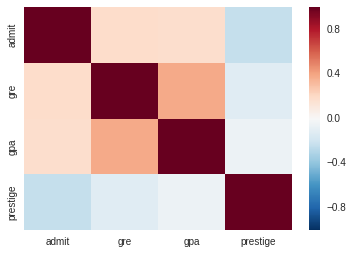

In [25]:
sns.heatmap(df.corr())

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now. 

Answer: 

1. Look at a sample of the data to get an overview of what it looks like and if there are any glaring issues.
    - pd.head()

2. Get summary statistics for the dataset to find the range of each variable, see if there are any missing values, and other basic stats like the mean and standard deviation for each variable.
    - pd.describe()
    
3. Test assumptions for the distribution of the data by visualizing with histograms, distribution plots, and box plots. Visualize the mean, median, and standard deviation on top of the plots.
    - pd.mean(), pd.median(), pd.mode(), pd.std()
    - sns.boxplot()
    - sns.distplot()
    
4. Test for collinearity of the variables all together and separately. Visualize with a heatmap and swarmplots.
    - pd.coll(), df[['admit', 'gpa']].sort_values(by='gpa').head(), etc.
    - sns.heatmap()
    - sns.swarmplot()

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model